In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import plot

In [2]:
df = pd.read_csv("/Users/juanreyesgarcia/Dev/Python/Django/reto/DreamedJobAI/Conocete_con_CompletaMente.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 59 columns):
 #   Column                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

# Proceso
## Paso 1: Agrupar y crear df por grupo
1. Dividir datos por grupos para mejor visualización, análisis y escalabilidad.
2. Suponiendo que las columnas que seleccioné representan de manera correcta cada grupo, estos se puedan tranformar de manera automática a un pandas df (tabla).
## Paso 2: Cleaning, Standardizing & Plotting
1. Dado que las respuestas de las preguntas no son uniformes y que no existe una guía para determinan que preguntas son de cada formulario. Se escogieron las preguntas que en mi opinión son más afines a los propositos y estilo del formulario.
2. Se realiza data processing & cleaning.
3. Se transforman los datos para que sean uniformes.
4. Se transforman los datos textuales a datos categóricos.
5. Se crea una columna sumando los scores de cada empleado.
6. Se crea las visualizaciones por cada formulario.

# Preguntas
1. ¿Hay alguna razón por la cual las preguntas no tienen respuestas uniformes?
2. ¿Por qué algunos empleados no contestaron todas las preguntas?
3. ¿Estos son los datos que se usan en prod?
4. ¿Hay un plan para cambiar el proceso de extracción, transformación y carga de datos?

# Sugerencias 
1. Poner labels para categorizar que pregunta pertenece a tal cuestionario.
2. Incorporar esto en postgresql no en un excel.
3. ID debe de ser un primary key en la db, todas las demas tables deberían de incorporar el ID como Foreign Key.
4. Las respuestas deben de ser uniformes desde su extracción.


# 1. Agrupar y crear df por grupo

In [4]:
ansiedad = [0, 12, 13, 19, 20, 21, 22, 23, 24, 25, 26, 27, 47]

In [5]:
ansiedad_df = df.iloc[:, ansiedad]

In [6]:
ansiedad_df.info()

ansiedad_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 13 columns):
 #   Column                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

,ID,"¿Has sentido ansiedad, nerviosismo o preocupación?",¿Qué tan a menudo has experimentado *dos o más* de los siguientes síntomas *juntos*?,"¿Has sentido depresión, ánimo bajo o poca capacidad de disfrutar?\r\n",¿Qué tanta presión sentiste al realizar tus responsabilidades?,Me siento tenso o nervioso.,"Tengo una sensación de miedo, como si algo horrible me fuera a suceder.",Tengo la mente llena de preocupaciones.,Puedo estar sentado cómodamente y sentirme relajado.,"Tengo una sensación extraña, como si tuviera mariposas o un nudo en el estómago.","Me siento inquieto, como si no pudiera parar de moverme.",Me asaltan sentimientos repentinos de pánico.,Me siento mal cuando pienso en cómo trato a los demás.
0,1001,La mayor parte del tiempo ...,Algunas veces ...,La mayor parte del tiempo ...,Un poco ...,Todos los días,"Definitivamente, y es muy fuerte ...",La mayoría de las veces,No muy a menudo ...,En ciertas ocasiones ...,No mucho ...,Rara vez,...
1,1002,Algunas veces ...,Algunas veces ...,Algunas veces ...,Moderada ...,A veces,"Un poco, pero no me preocupa ...",Con bastante frecuencia,No muy a menudo ...,En ciertas ocasiones ...,No mucho ...,Rara vez,...
2,1003,Todo el tiempo ...,Todos los días ...,Todo el tiempo ...,Mucha ...,Todos los días,"Definitivamente, y es muy fuerte ...",La mayoría de las veces,Nunca ...,Con bastante frecuencia ...,Siempre ...,Todo el tiempo,Todos los días ...
3,1004,La mayor parte del tiempo ...,Bastante seguido ...,Todo el tiempo ...,Moderada ...,Muchas veces,"Definitivamente, y es muy fuerte ...",La mayoría de las veces,No muy a menudo ...,Con bastante frecuencia ...,Bastante ...,Bastante a menudo,Una vez a la semana ...
4,1005,Algunas veces ...,Pocas veces ...,Algunas veces ...,Moderada ...,Muchas veces,"Sí, pero no es muy fuerte ...",Con bastante frecuencia,Por lo general ...,En ciertas ocasiones ...,No mucho ...,Rara vez,Varias veces a la semana ...


In [7]:
#CONSISTENCIA NO IMPORTA
general = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 36, 37, 38, 58]

In [8]:
general_df = df.iloc[:, general]

In [9]:
general_df.info()
general_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 16 columns):
 #   Column                                                                                                                                                      Non-Null Count  Dtype 
---  ------                                                                                                                                                      --------------  ----- 
 0   ID                                                                                                                                                          49 non-null     int64 
 1   ¿Cuál es tu fecha de nacimiento?                                                                                                                            49 non-null     object
 2   ¿Con qué género te identificas?                                                                                                                             

,ID,¿Cuál es tu fecha de nacimiento?,¿Con qué género te identificas?,¿Perteneces a la comunidad LGBT+?,¿Cuál es tu situación emocional?,¿Con quién vives?,¿Has sido diagnosticado con algún padecimiento de salud mental y sigue siendo un tema para ti?,¿Eres estudiante?,¿Qué estudias y en qué semestre vas?,"¿Consideras que actualmente presentas dificultades en tus estudios? Si la respuesta es *positiva*, describe por qué",¿Eres colaborador de la Uni?,¿Cuál es la emoción que ha predominado en ti?,¿Actualmente estás trabajando?,¿En qué área de tu empresa laboras?,¿Cuál es tu modalidad de trabajo?,Tu consentimiento es *importante*. Te compartimos nuestro *Acuerdo de Confidencialidad.*
0,1001,9/13/1934,Femenino,No,Soltero,Vivo solo,"Sí, sigue siendo un tema importante ...",No,Nada ...,No estudio ...,,Triste 😢,No,,,True
1,1002,10/16/2001,Masculino,No,Soltero,Con mis papás,No tengo padecimientos de salud mental ...,Sí,"Ingeniería Industrial, 6to Semestre ...","No me logro organizar de la manera adecuada, m...",,Ansioso 😖,No,,,True
2,1003,9/30/1992,Femenino,No,Casado,Con mi familia (pareja e hijos),"No tengo un diagnóstico, pero considero que sí...",No,Ni aplica ...,No aplica ...,,Triste 😢,Sí,Operaciones,Presencial,True
3,1004,1/16/2001,Femenino,No,Soltero,Con mis papás,"Sí, sigue siendo un tema importante ...",No,Nada ...,No ...,,Deprimido 😔,Sí,Ventas,Presencial,True
4,1005,1/9/2024,Femenino,No lo sé,Casado,Con mi familia (pareja e hijos),No tengo padecimientos de salud mental ...,No,No soy estudiante ...,No soy estudiante ...,,Preocupado 😟,Sí,Otro,Presencial,True


In [10]:
#INT -> values
cuidado_fisico = [0, 14, 15, 16, 17, 18]

In [11]:
cuidado_fisico_df = df.iloc[:, cuidado_fisico]

In [12]:
cuidado_fisico_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 6 columns):
 #   Column                                                                         Non-Null Count  Dtype
---  ------                                                                         --------------  -----
 0   ID                                                                             49 non-null     int64
 1   En *promedio*, ¿cuántos *días* a la semana realizaste actividad física? 🚴‍♂️   49 non-null     int64
 2   ¿Cuánta satisfacción has sentido con tu nivel de actividad física?             49 non-null     int64
 3   ¿Qué tanto has cuidado tu alimentación?                                        49 non-null     int64
 4   En *promedio*, ¿cuántas horas duermes *en las noches*? 😴                       49 non-null     int64
 5   ¿Cómo evaluarías tu calidad de sueño?                                          49 non-null     int64
dtypes: int64(6)
memory usage: 2.4 KB


In [13]:
#All answers are consistent
depresion = [0, 28, 29, 30, 31, 32, 33, 34, 35]

In [14]:
depresion_df = df.iloc[:, depresion]

In [15]:
depresion_df.info()
depresion_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 9 columns):
 #   Column                                                                                                                                                                                 Non-Null Count  Dtype 
---  ------                                                                                                                                                                                 --------------  ----- 
 0   ID                                                                                                                                                                                     49 non-null     int64 
 1   He sentido poco interés o agrado al hacer las cosas.                                                                                                                                   49 non-null     object
 2   Me he sentido triste, deprimido o sin esperanzas.

,ID,He sentido poco interés o agrado al hacer las cosas.,"Me he sentido triste, deprimido o sin esperanzas.","He tenido problemas para dormir, mantenerme despierto o duermo demasiado.",Me siento cansado o con poca energía.,Tengo poco apetito o apetito excesivo.,He tenido problemas para concentrarme en actividades como leer o ver la televisión.,"Me he sentido mal conmigo mismo, que soy un fracaso, o que me he fallado a mí mismo o a mi familia.","Me muevo o hablo tan despacio que otras personas pueden darse cuenta. O por el contrario: Estoy tan inquieto e intranquilo que doy vueltas de un lugar a otro, más que de costumbre."
0,1001,Más de la mitad de los días (de 7 a 11 días) ...,Más de la mitad de los días (de 7 a 11 días) ...,Más de la mitad de los días (de 7 a 11 días) ...,Más de la mitad de los días (de 7 a 11 días),Más de la mitad de los días (de 7 a 11 días),Ningún día ...,Más de la mitad de los días (de 7 a 11 días) ...,Varios días (de 1 a 6 días) ...
1,1002,Varios días (de 1 a 6 días) ...,Varios días (de 1 a 6 días) ...,Varios días (de 1 a 6 días) ...,Varios días (de 1 a 6 días),Varios días (de 1 a 6 días),Varios días (de 1 a 6 días) ...,Varios días (de 1 a 6 días) ...,Más de la mitad de los días (de 7 a 11 días) ...
2,1003,Casi todos los días ...,Casi todos los días ...,Casi todos los días ...,Casi todos los días,Casi todos los días,Casi todos los días ...,Casi todos los días ...,Casi todos los días ...
3,1004,Más de la mitad de los días (de 7 a 11 días) ...,Casi todos los días ...,Casi todos los días ...,Casi todos los días,Casi todos los días,Casi todos los días ...,Casi todos los días ...,Casi todos los días ...
4,1005,Ningún día ...,Varios días (de 1 a 6 días) ...,Varios días (de 1 a 6 días) ...,Varios días (de 1 a 6 días),Varios días (de 1 a 6 días),Más de la mitad de los días (de 7 a 11 días) ...,Más de la mitad de los días (de 7 a 11 días) ...,Ningún día ...


In [16]:
#All answers are consistent
burnout = [0, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]

In [17]:
burnout_df = df.iloc[:, burnout]

In [18]:
burnout_df.info()
burnout_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 11 columns):
 #   Column                                                                                                                  Non-Null Count  Dtype 
---  ------                                                                                                                  --------------  ----- 
 0   ID                                                                                                                      49 non-null     int64 
 1   Cada vez es más frecuente que trate a las personas como si fueran objetos.                                              49 non-null     object
 2   Parece que los demás tienen cada vez menos interés en mi trabajo. No saben valorar mi trabajo.                          49 non-null     object
 3   Mi trabajo hace que cada vez me importen menos los demás. Además, tampoco tengo tiempo para dedicarles.                 49 non-null     object
 4   Mi t

,ID,Cada vez es más frecuente que trate a las personas como si fueran objetos.,Parece que los demás tienen cada vez menos interés en mi trabajo. No saben valorar mi trabajo.,"Mi trabajo hace que cada vez me importen menos los demás. Además, tampoco tengo tiempo para dedicarles.",Mi trabajo me deja emocionalmente frío o insensible.,Cada vez me satura más tener que hacer cosas con personas. Después de trabajar con compañeros me siento agotado.,Cada vez con más frecuencia me enfada o asusta que personas de mi entorno tengan problemas. Me afecta mucho.,Últimamente participo en las conversaciones más irritado que antes.,"Últimamente no consigo desempeñar mi profesión como se supone que debería realizarla. A menudo, el trabajo me supera.",Me siento mal cuando pienso en cómo trato a los demás.,"Mi situación es desesperada y no tengo ninguna salida. A veces, tengo la sensación de estar al borde del precipicio."
0,1001,...,...,...,...,...,...,...,...,...,...
1,1002,...,...,...,...,...,...,...,...,...,...
2,1003,Nunca ...,Un par de veces al mes ...,Nunca ...,Nunca ...,Nunca ...,Un par de veces al mes ...,Nunca ...,Nunca ...,Todos los días ...,Todos los días ...
3,1004,Un par de veces al mes ...,Nunca ...,Un par de veces al mes ...,Una vez a la semana ...,Todos los días ...,Una vez a la semana ...,Un par de veces al mes ...,Un par de veces al mes ...,Una vez a la semana ...,Varias veces a la semana ...
4,1005,Nunca ...,Varias veces al año ...,Nunca ...,Nunca ...,Una vez a la semana ...,Varias veces a la semana ...,Varias veces a la semana ...,Un par de veces al mes ...,Varias veces a la semana ...,Un par de veces al mes ...


In [19]:
#All answers are consistent
uwes = [0, 49, 50, 51, 52, 53, 54, 55, 56, 57]

In [20]:
uwes_df = df.iloc[:, uwes]

In [21]:
uwes_df.info()
uwes_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 10 columns):
 #   Column                                                            Non-Null Count  Dtype 
---  ------                                                            --------------  ----- 
 0   ID                                                                49 non-null     int64 
 1   En mi trabajo me siento lleno de energía.                         49 non-null     object
 2   Soy fuerte y energético en mi trabajo.                            49 non-null     object
 3   Estoy entusiasmado con mi trabajo.                                49 non-null     object
 4   Mi trabajo me inspira.                                            49 non-null     object
 5   Cuando me levanto por las mañanas tengo ganas de ir a trabajar.   49 non-null     object
 6   Soy feliz cuando estoy absorto en mi trabajo.                     49 non-null     object
 7   Estoy orgulloso del trabajo que hago.         

,ID,En mi trabajo me siento lleno de energía.,Soy fuerte y energético en mi trabajo.,Estoy entusiasmado con mi trabajo.,Mi trabajo me inspira.,Cuando me levanto por las mañanas tengo ganas de ir a trabajar.,Soy feliz cuando estoy absorto en mi trabajo.,Estoy orgulloso del trabajo que hago.,Estoy inmerso en mi trabajo.,"Me ""dejo llevar"" por mi trabajo."
0,1001,,,,,...,,,,
1,1002,,,,,...,,,,
2,1003,Algunas veces,Algunas veces,Algunas veces,Algunas veces,Algunas veces ...,Algunas veces,Algunas veces,Algunas veces,Casi nunca
3,1004,Regularmente,Regularmente,Algunas veces,Algunas veces,Algunas veces ...,Casi nunca,Casi nunca,Algunas veces,Algunas veces
4,1005,Casi siempre,Casi siempre,Casi siempre,Casi siempre,Casi siempre ...,Casi siempre,Siempre,Casi siempre,Bastantes veces


# Cleaning, Standardizing & Plotting  -> ANSIEDAD 

In [22]:
ansiedad_formulario_columns = [0, 1, 2, 3, 5, 7, 11, 12]

In [23]:
ansiedad_formulario_df = ansiedad_df.iloc[:, ansiedad_formulario_columns].copy()

In [24]:
ansiedad_formulario_df.info()
ansiedad_formulario_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 8 columns):
 #   Column                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

,ID,"¿Has sentido ansiedad, nerviosismo o preocupación?",¿Qué tan a menudo has experimentado *dos o más* de los siguientes síntomas *juntos*?,"¿Has sentido depresión, ánimo bajo o poca capacidad de disfrutar?\r\n",Me siento tenso o nervioso.,Tengo la mente llena de preocupaciones.,Me asaltan sentimientos repentinos de pánico.,Me siento mal cuando pienso en cómo trato a los demás.
0,1001,La mayor parte del tiempo ...,Algunas veces ...,La mayor parte del tiempo ...,Todos los días,La mayoría de las veces,Rara vez,...
1,1002,Algunas veces ...,Algunas veces ...,Algunas veces ...,A veces,Con bastante frecuencia,Rara vez,...
2,1003,Todo el tiempo ...,Todos los días ...,Todo el tiempo ...,Todos los días,La mayoría de las veces,Todo el tiempo,Todos los días ...
3,1004,La mayor parte del tiempo ...,Bastante seguido ...,Todo el tiempo ...,Muchas veces,La mayoría de las veces,Bastante a menudo,Una vez a la semana ...
4,1005,Algunas veces ...,Pocas veces ...,Algunas veces ...,Muchas veces,Con bastante frecuencia,Rara vez,Varias veces a la semana ...


In [25]:
mapping_1 = {
    "Todo el tiempo": "Todos los días",
    "La mayor parte del tiempo": "Muchas veces",
    "Algunas veces": "A veces",
    "Casi nunca": "Nunca",
}

mapping_2 = {
    "Bastante seguido": "Muchas veces",
    "Pocas veces": "A veces",
    "Algunas veces": "A veces",
    "Nunca": "Nunca",
}

mapping_3 = {
    "Todo el tiempo": "Todos los días",
    "La mayor parte del tiempo": "Muchas veces",
    "Algunas veces": "A veces",
    "Casi nunca": "Nunca",
}

mapping_5 = {
    "La mayoría de las veces": "Muchas veces",
    "Con bastante frecuencia": "Muchas veces",
    "A veces, aunque no muy a menudo": "A veces",
}

mapping_6 = {
    "Todo el tiempo": "Todos los días",
    "Bastante a menudo": "Muchas veces",
    "Rara vez": "A veces",
}

mapping_7 = {
    "Varias veces a la semana": "Muchas veces",
    "Una vez a la semana": "A veces",
    "Un par de veces al mes": "A veces",
    "Una vez al mes": "A veces",
    "Varias veces al año": "A veces"
}

In [26]:
ansiedad_formulario_mapping = {
    "Todos los días": 3,
    "Muchas veces": 2,
    "A veces": 1,
    "Nunca": 0
}

In [27]:
#Limpiando
pattern_to_replace = r"\s*\.{3,}\s*"

for column in ansiedad_formulario_df.select_dtypes(include='object').columns:
    ansiedad_formulario_df.loc[:, column] = ansiedad_formulario_df.loc[:, column].str.replace(pattern_to_replace, "", regex=True)

In [28]:
ansiedad_formulario_df.replace(r'^\s*$', np.nan, regex=True, inplace=True)

In [29]:
def standardize_column(df, column_index, mapping):
    df.iloc[:, column_index] = df.iloc[:, column_index].astype(str)
    
    # Trim whitespace
    df.iloc[:, column_index] = df.iloc[:, column_index].str.strip()
    
    df.iloc[:, column_index] = df.iloc[:, column_index].map(mapping).fillna(df.iloc[:, column_index])

In [30]:
standardize_column(ansiedad_formulario_df, 1, mapping_1)
standardize_column(ansiedad_formulario_df, 2, mapping_2)
standardize_column(ansiedad_formulario_df, 3, mapping_3)
standardize_column(ansiedad_formulario_df, 5, mapping_5)
standardize_column(ansiedad_formulario_df, 6, mapping_6)
standardize_column(ansiedad_formulario_df, 7, mapping_7)

In [31]:
def textual_to_numerical(df, mapping):
    for column in df.columns:
        # Ensure the column is of type string
        df[column] = df[column].astype(str)
        
        # Trim whitespace from the column values
        df[column] = df[column].str.strip()
        
        # Apply the mapping
        df[column] = df[column].map(mapping).fillna(df[column])

In [32]:
ansiedad_formulario_mapping = {
    "Todos los días": 3,
    "Muchas veces": 2,
    "A veces": 1,
    "Nunca": 0,
    "nan": 0,
}

textual_to_numerical(ansiedad_formulario_df, ansiedad_formulario_mapping)

# Check the DataFrame to ensure the mapping has been applied
ansiedad_formulario_df

,ID,"¿Has sentido ansiedad, nerviosismo o preocupación?",¿Qué tan a menudo has experimentado *dos o más* de los siguientes síntomas *juntos*?,"¿Has sentido depresión, ánimo bajo o poca capacidad de disfrutar?\r\n",Me siento tenso o nervioso.,Tengo la mente llena de preocupaciones.,Me asaltan sentimientos repentinos de pánico.,Me siento mal cuando pienso en cómo trato a los demás.
0,1001,2,1,2,3,2,1,0
1,1002,1,1,1,1,2,1,0
2,1003,3,3,3,3,2,3,3
3,1004,2,2,3,2,2,2,1
4,1005,1,1,1,2,2,1,2
5,1006,2,1,2,3,2,3,1
6,1007,2,0,2,2,2,1,0
7,1008,1,0,2,1,1,1,0
8,1009,2,2,1,3,2,2,0
9,1010,1,1,1,1,2,0,0


In [33]:
#Calcula el total
for col in ansiedad_formulario_df.columns[1:]: 
    ansiedad_formulario_df[col] = pd.to_numeric(ansiedad_formulario_df[col], errors='coerce')

ansiedad_formulario_df['ValorTotalAnsiedad'] = ansiedad_formulario_df.iloc[:, 1:].sum(axis=1)

ansiedad_formulario_df['ValorTotalAnsiedad'] = ansiedad_formulario_df['ValorTotalAnsiedad'].astype('Int64')


In [34]:
ansiedad_formulario_df.head()

,ID,"¿Has sentido ansiedad, nerviosismo o preocupación?",¿Qué tan a menudo has experimentado *dos o más* de los siguientes síntomas *juntos*?,"¿Has sentido depresión, ánimo bajo o poca capacidad de disfrutar?\r\n",Me siento tenso o nervioso.,Tengo la mente llena de preocupaciones.,Me asaltan sentimientos repentinos de pánico.,Me siento mal cuando pienso en cómo trato a los demás.,ValorTotalAnsiedad
0,1001,2,1,2,3,2,1,0,11
1,1002,1,1,1,1,2,1,0,7
2,1003,3,3,3,3,2,3,3,20
3,1004,2,2,3,2,2,2,1,14
4,1005,1,1,1,2,2,1,2,10


In [35]:
ansiedad_formulario_matrix_columns = [0, -1]

ansiedad_formulario_matrix_df = ansiedad_formulario_df.iloc[:, ansiedad_formulario_matrix_columns].copy()

In [36]:
ansiedad_formulario_matrix_df.head()

,ID,ValorTotalAnsiedad
0,1001,11
1,1002,7
2,1003,20
3,1004,14
4,1005,10


In [37]:
def categorize_anxiety(value):
    if value <= 7:
        return 'Bajo'
    elif 8 <= value <= 10:
        return 'Medio'
    else:
        return 'Alto'

ansiedad_formulario_matrix_df['prioridad'] = ansiedad_formulario_matrix_df['ValorTotalAnsiedad'].apply(categorize_anxiety)

In [38]:
ansiedad_formulario_matrix_df.head()

,ID,ValorTotalAnsiedad,prioridad
0,1001,11,Alto
1,1002,7,Bajo
2,1003,20,Alto
3,1004,14,Alto
4,1005,10,Medio


### Plot

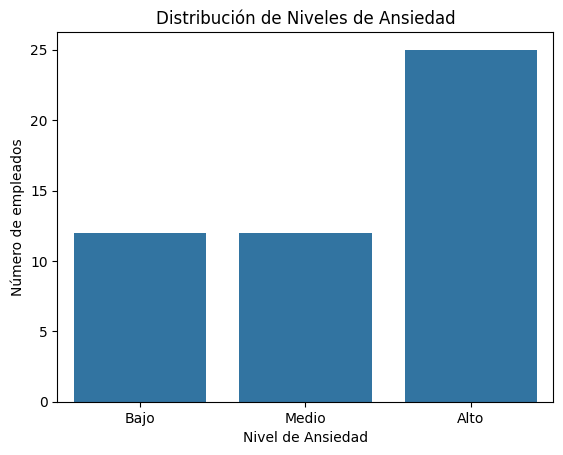

In [39]:
sns.countplot(x='prioridad', data=ansiedad_formulario_matrix_df, order=['Bajo', 'Medio', 'Alto'])
plt.title('Distribución de Niveles de Ansiedad')
plt.xlabel('Nivel de Ansiedad')
plt.ylabel('Número de empleados')
plt.show()

In [40]:
ansiedad_formulario_matrix_df.columns = ansiedad_formulario_matrix_df.columns.str.strip()

In [41]:
fig = px.scatter(
    ansiedad_formulario_matrix_df,
    x='ID',
    y='ValorTotalAnsiedad',
    color='prioridad',
    color_discrete_map={
        'Alto': 'red',
        'Medio': 'yellow',
        'Bajo': 'green'
    },
    hover_data=['ID']
)

fig.update_layout(
    title='Niveles de Ansiedad por ID',
    xaxis_title='ID',
    yaxis_title='ValorTotalAnsiedad',
    legend_title='Nivel de Ansiedad'
)

plot(fig, filename='/Users/juanreyesgarcia/Dev/Python/Django/reto/DreamedJobAI/html/ansiedad.html')

'/Users/juanreyesgarcia/Dev/Python/Django/reto/DreamedJobAI/html/ansiedad.html'

# Cleaning, Standardizing & Plotting -> DEPRESIÓN 

In [42]:
depresion_formulario_df = depresion_df.copy()
depresion_formulario_df

,ID,He sentido poco interés o agrado al hacer las cosas.,"Me he sentido triste, deprimido o sin esperanzas.","He tenido problemas para dormir, mantenerme despierto o duermo demasiado.",Me siento cansado o con poca energía.,Tengo poco apetito o apetito excesivo.,He tenido problemas para concentrarme en actividades como leer o ver la televisión.,"Me he sentido mal conmigo mismo, que soy un fracaso, o que me he fallado a mí mismo o a mi familia.","Me muevo o hablo tan despacio que otras personas pueden darse cuenta. O por el contrario: Estoy tan inquieto e intranquilo que doy vueltas de un lugar a otro, más que de costumbre."
0,1001,Más de la mitad de los días (de 7 a 11 días) ...,Más de la mitad de los días (de 7 a 11 días) ...,Más de la mitad de los días (de 7 a 11 días) ...,Más de la mitad de los días (de 7 a 11 días),Más de la mitad de los días (de 7 a 11 días),Ningún día ...,Más de la mitad de los días (de 7 a 11 días) ...,Varios días (de 1 a 6 días) ...
1,1002,Varios días (de 1 a 6 días) ...,Varios días (de 1 a 6 días) ...,Varios días (de 1 a 6 días) ...,Varios días (de 1 a 6 días),Varios días (de 1 a 6 días),Varios días (de 1 a 6 días) ...,Varios días (de 1 a 6 días) ...,Más de la mitad de los días (de 7 a 11 días) ...
2,1003,Casi todos los días ...,Casi todos los días ...,Casi todos los días ...,Casi todos los días,Casi todos los días,Casi todos los días ...,Casi todos los días ...,Casi todos los días ...
3,1004,Más de la mitad de los días (de 7 a 11 días) ...,Casi todos los días ...,Casi todos los días ...,Casi todos los días,Casi todos los días,Casi todos los días ...,Casi todos los días ...,Casi todos los días ...
4,1005,Ningún día ...,Varios días (de 1 a 6 días) ...,Varios días (de 1 a 6 días) ...,Varios días (de 1 a 6 días),Varios días (de 1 a 6 días),Más de la mitad de los días (de 7 a 11 días) ...,Más de la mitad de los días (de 7 a 11 días) ...,Ningún día ...
5,1006,Varios días (de 1 a 6 días) ...,Varios días (de 1 a 6 días) ...,Más de la mitad de los días (de 7 a 11 días) ...,Casi todos los días,Casi todos los días,Más de la mitad de los días (de 7 a 11 días) ...,Casi todos los días ...,Casi todos los días ...
6,1007,Varios días (de 1 a 6 días) ...,Más de la mitad de los días (de 7 a 11 días) ...,Más de la mitad de los días (de 7 a 11 días) ...,Casi todos los días,Más de la mitad de los días (de 7 a 11 días),Casi todos los días ...,Más de la mitad de los días (de 7 a 11 días) ...,Varios días (de 1 a 6 días) ...
7,1008,Varios días (de 1 a 6 días) ...,Varios días (de 1 a 6 días) ...,Más de la mitad de los días (de 7 a 11 días) ...,Más de la mitad de los días (de 7 a 11 días),Varios días (de 1 a 6 días),Ningún día ...,Ningún día ...,Ningún día ...
8,1009,Varios días (de 1 a 6 días) ...,Varios días (de 1 a 6 días) ...,Más de la mitad de los días (de 7 a 11 días) ...,Más de la mitad de los días (de 7 a 11 días),Casi todos los días,Casi todos los días ...,Casi todos los días ...,Más de la mitad de los días (de 7 a 11 días) ...
9,1010,Varios días (de 1 a 6 días) ...,Varios días (de 1 a 6 días) ...,Varios días (de 1 a 6 días) ...,Varios días (de 1 a 6 días),Ningún día,Varios días (de 1 a 6 días) ...,Varios días (de 1 a 6 días) ...,Ningún día ...


In [43]:
depresion_formulario_mapping = {
    "Casi todos los días": 3,
    "Más de la mitad de los días (de 7 a 11 días)": 2,
    "Varios días (de 1 a 6 días)": 1,
    "Ningún día": 0
}


In [44]:
# Limpiando
pattern_to_replace = r"\s*\.{3,}\s*"

for column in depresion_formulario_df.select_dtypes(include='object').columns:
    depresion_formulario_df.loc[:, column] = (
        depresion_formulario_df.loc[:, column]
        .str.replace(pattern_to_replace, "", regex=True)
        .str.strip()
    )


In [45]:
depresion_formulario_df.head()

,ID,He sentido poco interés o agrado al hacer las cosas.,"Me he sentido triste, deprimido o sin esperanzas.","He tenido problemas para dormir, mantenerme despierto o duermo demasiado.",Me siento cansado o con poca energía.,Tengo poco apetito o apetito excesivo.,He tenido problemas para concentrarme en actividades como leer o ver la televisión.,"Me he sentido mal conmigo mismo, que soy un fracaso, o que me he fallado a mí mismo o a mi familia.","Me muevo o hablo tan despacio que otras personas pueden darse cuenta. O por el contrario: Estoy tan inquieto e intranquilo que doy vueltas de un lugar a otro, más que de costumbre."
0,1001,Más de la mitad de los días (de 7 a 11 días),Más de la mitad de los días (de 7 a 11 días),Más de la mitad de los días (de 7 a 11 días),Más de la mitad de los días (de 7 a 11 días),Más de la mitad de los días (de 7 a 11 días),Ningún día,Más de la mitad de los días (de 7 a 11 días),Varios días (de 1 a 6 días)
1,1002,Varios días (de 1 a 6 días),Varios días (de 1 a 6 días),Varios días (de 1 a 6 días),Varios días (de 1 a 6 días),Varios días (de 1 a 6 días),Varios días (de 1 a 6 días),Varios días (de 1 a 6 días),Más de la mitad de los días (de 7 a 11 días)
2,1003,Casi todos los días,Casi todos los días,Casi todos los días,Casi todos los días,Casi todos los días,Casi todos los días,Casi todos los días,Casi todos los días
3,1004,Más de la mitad de los días (de 7 a 11 días),Casi todos los días,Casi todos los días,Casi todos los días,Casi todos los días,Casi todos los días,Casi todos los días,Casi todos los días
4,1005,Ningún día,Varios días (de 1 a 6 días),Varios días (de 1 a 6 días),Varios días (de 1 a 6 días),Varios días (de 1 a 6 días),Más de la mitad de los días (de 7 a 11 días),Más de la mitad de los días (de 7 a 11 días),Ningún día


In [46]:
depresion_formulario_df.replace(r'^\s*$', np.nan, regex=True, inplace=True)

In [47]:
depresion_formulario_df.head()

,ID,He sentido poco interés o agrado al hacer las cosas.,"Me he sentido triste, deprimido o sin esperanzas.","He tenido problemas para dormir, mantenerme despierto o duermo demasiado.",Me siento cansado o con poca energía.,Tengo poco apetito o apetito excesivo.,He tenido problemas para concentrarme en actividades como leer o ver la televisión.,"Me he sentido mal conmigo mismo, que soy un fracaso, o que me he fallado a mí mismo o a mi familia.","Me muevo o hablo tan despacio que otras personas pueden darse cuenta. O por el contrario: Estoy tan inquieto e intranquilo que doy vueltas de un lugar a otro, más que de costumbre."
0,1001,Más de la mitad de los días (de 7 a 11 días),Más de la mitad de los días (de 7 a 11 días),Más de la mitad de los días (de 7 a 11 días),Más de la mitad de los días (de 7 a 11 días),Más de la mitad de los días (de 7 a 11 días),Ningún día,Más de la mitad de los días (de 7 a 11 días),Varios días (de 1 a 6 días)
1,1002,Varios días (de 1 a 6 días),Varios días (de 1 a 6 días),Varios días (de 1 a 6 días),Varios días (de 1 a 6 días),Varios días (de 1 a 6 días),Varios días (de 1 a 6 días),Varios días (de 1 a 6 días),Más de la mitad de los días (de 7 a 11 días)
2,1003,Casi todos los días,Casi todos los días,Casi todos los días,Casi todos los días,Casi todos los días,Casi todos los días,Casi todos los días,Casi todos los días
3,1004,Más de la mitad de los días (de 7 a 11 días),Casi todos los días,Casi todos los días,Casi todos los días,Casi todos los días,Casi todos los días,Casi todos los días,Casi todos los días
4,1005,Ningún día,Varios días (de 1 a 6 días),Varios días (de 1 a 6 días),Varios días (de 1 a 6 días),Varios días (de 1 a 6 días),Más de la mitad de los días (de 7 a 11 días),Más de la mitad de los días (de 7 a 11 días),Ningún día


In [48]:
textual_to_numerical(depresion_formulario_df, depresion_formulario_mapping)
depresion_formulario_df

,ID,He sentido poco interés o agrado al hacer las cosas.,"Me he sentido triste, deprimido o sin esperanzas.","He tenido problemas para dormir, mantenerme despierto o duermo demasiado.",Me siento cansado o con poca energía.,Tengo poco apetito o apetito excesivo.,He tenido problemas para concentrarme en actividades como leer o ver la televisión.,"Me he sentido mal conmigo mismo, que soy un fracaso, o que me he fallado a mí mismo o a mi familia.","Me muevo o hablo tan despacio que otras personas pueden darse cuenta. O por el contrario: Estoy tan inquieto e intranquilo que doy vueltas de un lugar a otro, más que de costumbre."
0,1001,2,2,2,2,2,0,2,1
1,1002,1,1,1,1,1,1,1,2
2,1003,3,3,3,3,3,3,3,3
3,1004,2,3,3,3,3,3,3,3
4,1005,0,1,1,1,1,2,2,0
5,1006,1,1,2,3,3,2,3,3
6,1007,1,2,2,3,2,3,2,1
7,1008,1,1,2,2,1,0,0,0
8,1009,1,1,2,2,3,3,3,2
9,1010,1,1,1,1,0,1,1,0


In [49]:
#Calcula el total
for col in depresion_formulario_df.columns[1:]: 
    depresion_formulario_df[col] = pd.to_numeric(depresion_formulario_df[col], errors='coerce')

depresion_formulario_df['ValorTotalDepresion'] = depresion_formulario_df.iloc[:, 1:].sum(axis=1)

depresion_formulario_df['ValorTotalDepresion'] = depresion_formulario_df['ValorTotalDepresion'].astype('Int64')

depresion_formulario_df.head()


,ID,He sentido poco interés o agrado al hacer las cosas.,"Me he sentido triste, deprimido o sin esperanzas.","He tenido problemas para dormir, mantenerme despierto o duermo demasiado.",Me siento cansado o con poca energía.,Tengo poco apetito o apetito excesivo.,He tenido problemas para concentrarme en actividades como leer o ver la televisión.,"Me he sentido mal conmigo mismo, que soy un fracaso, o que me he fallado a mí mismo o a mi familia.","Me muevo o hablo tan despacio que otras personas pueden darse cuenta. O por el contrario: Estoy tan inquieto e intranquilo que doy vueltas de un lugar a otro, más que de costumbre.",ValorTotalDepresion
0,1001,2,2,2,2,2,0,2,1,13
1,1002,1,1,1,1,1,1,1,2,9
2,1003,3,3,3,3,3,3,3,3,24
3,1004,2,3,3,3,3,3,3,3,23
4,1005,0,1,1,1,1,2,2,0,8


In [50]:
depresion_formulario_matrix_columns = [0, -1]

depresion_formulario_matrix_df = depresion_formulario_df.iloc[:, depresion_formulario_matrix_columns].copy()

depresion_formulario_matrix_df.head()

,ID,ValorTotalDepresion
0,1001,13
1,1002,9
2,1003,24
3,1004,23
4,1005,8


In [51]:
def categorize_depression(value):
    if value <= 7:
        return 'Bajo'
    elif 8 <= value <= 15:
        return 'Medio'
    else:
        return 'Alto'

depresion_formulario_matrix_df['prioridad'] = depresion_formulario_matrix_df['ValorTotalDepresion'].apply(categorize_depression)
depresion_formulario_matrix_df.head()

,ID,ValorTotalDepresion,prioridad
0,1001,13,Medio
1,1002,9,Medio
2,1003,24,Alto
3,1004,23,Alto
4,1005,8,Medio


In [52]:
depresion_formulario_matrix_df.columns = depresion_formulario_matrix_df.columns.str.strip()

### GRÁFICA DEPRESIÓN

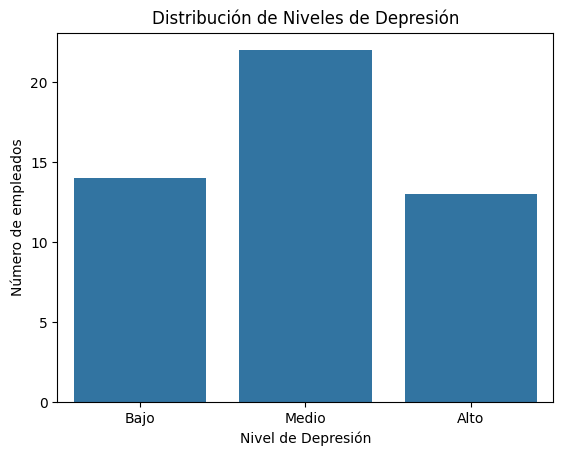

In [53]:
sns.countplot(x='prioridad', data=depresion_formulario_matrix_df, order=['Bajo', 'Medio', 'Alto'])
plt.title('Distribución de Niveles de Depresión')
plt.xlabel('Nivel de Depresión')
plt.ylabel('Número de empleados')
plt.show()

In [54]:
fig = px.scatter(
    depresion_formulario_matrix_df,
    x='ID',
    y='ValorTotalDepresion',
    color='prioridad',
    color_discrete_map={
        'Alto': 'red',
        'Medio': 'yellow',
        'Bajo': 'green'
    },
    hover_data=['ID']
)

fig.update_layout(
    title='Niveles de Depresión por ID',
    xaxis_title='ID',
    yaxis_title='ValorTotalDepresion',
    legend_title='Nivel de Depresión'
)

plot(fig, filename='/Users/juanreyesgarcia/Dev/Python/Django/reto/DreamedJobAI/html/depresion.html')

'/Users/juanreyesgarcia/Dev/Python/Django/reto/DreamedJobAI/html/depresion.html'

# Cleaning, Standardizing & Plotting -> BURNOUT 

In [55]:
burnout_formulario_df = burnout_df.copy()
burnout_formulario_df

,ID,Cada vez es más frecuente que trate a las personas como si fueran objetos.,Parece que los demás tienen cada vez menos interés en mi trabajo. No saben valorar mi trabajo.,"Mi trabajo hace que cada vez me importen menos los demás. Además, tampoco tengo tiempo para dedicarles.",Mi trabajo me deja emocionalmente frío o insensible.,Cada vez me satura más tener que hacer cosas con personas. Después de trabajar con compañeros me siento agotado.,Cada vez con más frecuencia me enfada o asusta que personas de mi entorno tengan problemas. Me afecta mucho.,Últimamente participo en las conversaciones más irritado que antes.,"Últimamente no consigo desempeñar mi profesión como se supone que debería realizarla. A menudo, el trabajo me supera.",Me siento mal cuando pienso en cómo trato a los demás.,"Mi situación es desesperada y no tengo ninguna salida. A veces, tengo la sensación de estar al borde del precipicio."
0,1001,...,...,...,...,...,...,...,...,...,...
1,1002,...,...,...,...,...,...,...,...,...,...
2,1003,Nunca ...,Un par de veces al mes ...,Nunca ...,Nunca ...,Nunca ...,Un par de veces al mes ...,Nunca ...,Nunca ...,Todos los días ...,Todos los días ...
3,1004,Un par de veces al mes ...,Nunca ...,Un par de veces al mes ...,Una vez a la semana ...,Todos los días ...,Una vez a la semana ...,Un par de veces al mes ...,Un par de veces al mes ...,Una vez a la semana ...,Varias veces a la semana ...
4,1005,Nunca ...,Varias veces al año ...,Nunca ...,Nunca ...,Una vez a la semana ...,Varias veces a la semana ...,Varias veces a la semana ...,Un par de veces al mes ...,Varias veces a la semana ...,Un par de veces al mes ...
5,1006,Un par de veces al mes ...,Varias veces a la semana ...,Una vez a la semana ...,Una vez al mes ...,Un par de veces al mes ...,Varias veces a la semana ...,Varias veces a la semana ...,Varias veces a la semana ...,Un par de veces al mes ...,Una vez a la semana ...
6,1007,...,...,...,...,...,...,...,...,...,...
7,1008,...,...,...,...,...,...,...,...,...,...
8,1009,Nunca ...,Una vez al mes ...,Varias veces al año ...,Varias veces al año ...,Nunca ...,Un par de veces al mes ...,Un par de veces al mes ...,Un par de veces al mes ...,Nunca ...,Un par de veces al mes ...
9,1010,Nunca ...,Un par de veces al mes ...,Nunca ...,Nunca ...,Nunca ...,Nunca ...,Nunca ...,Un par de veces al mes ...,Nunca ...,Una vez al mes ...


In [56]:
burnout_formulario_mapping = {
    "Todos los días": 6,
    "Varias veces a la semana": 5,
    "Una vez a la semana": 4,
    "Un par de veces al mes": 3,
    "Una vez al mes": 2,
    "Varias veces al año": 1,
    "Nunca": 0
}

In [57]:
# Limpiando
pattern_to_replace = r"\s*\.{3,}\s*"

for column in burnout_formulario_df.select_dtypes(include='object').columns:
    burnout_formulario_df.loc[:, column] = (
        burnout_formulario_df.loc[:, column]
        .str.replace(pattern_to_replace, "", regex=True)
        .str.strip()
    )

burnout_formulario_df.head()


,ID,Cada vez es más frecuente que trate a las personas como si fueran objetos.,Parece que los demás tienen cada vez menos interés en mi trabajo. No saben valorar mi trabajo.,"Mi trabajo hace que cada vez me importen menos los demás. Además, tampoco tengo tiempo para dedicarles.",Mi trabajo me deja emocionalmente frío o insensible.,Cada vez me satura más tener que hacer cosas con personas. Después de trabajar con compañeros me siento agotado.,Cada vez con más frecuencia me enfada o asusta que personas de mi entorno tengan problemas. Me afecta mucho.,Últimamente participo en las conversaciones más irritado que antes.,"Últimamente no consigo desempeñar mi profesión como se supone que debería realizarla. A menudo, el trabajo me supera.",Me siento mal cuando pienso en cómo trato a los demás.,"Mi situación es desesperada y no tengo ninguna salida. A veces, tengo la sensación de estar al borde del precipicio."
0,1001,,,,,,,,,,
1,1002,,,,,,,,,,
2,1003,Nunca,Un par de veces al mes,Nunca,Nunca,Nunca,Un par de veces al mes,Nunca,Nunca,Todos los días,Todos los días
3,1004,Un par de veces al mes,Nunca,Un par de veces al mes,Una vez a la semana,Todos los días,Una vez a la semana,Un par de veces al mes,Un par de veces al mes,Una vez a la semana,Varias veces a la semana
4,1005,Nunca,Varias veces al año,Nunca,Nunca,Una vez a la semana,Varias veces a la semana,Varias veces a la semana,Un par de veces al mes,Varias veces a la semana,Un par de veces al mes


In [58]:
burnout_formulario_df.replace(r'^\s*$', np.nan, regex=True, inplace=True)
burnout_formulario_df = burnout_formulario_df.fillna(0)
burnout_formulario_df.head()

,ID,Cada vez es más frecuente que trate a las personas como si fueran objetos.,Parece que los demás tienen cada vez menos interés en mi trabajo. No saben valorar mi trabajo.,"Mi trabajo hace que cada vez me importen menos los demás. Además, tampoco tengo tiempo para dedicarles.",Mi trabajo me deja emocionalmente frío o insensible.,Cada vez me satura más tener que hacer cosas con personas. Después de trabajar con compañeros me siento agotado.,Cada vez con más frecuencia me enfada o asusta que personas de mi entorno tengan problemas. Me afecta mucho.,Últimamente participo en las conversaciones más irritado que antes.,"Últimamente no consigo desempeñar mi profesión como se supone que debería realizarla. A menudo, el trabajo me supera.",Me siento mal cuando pienso en cómo trato a los demás.,"Mi situación es desesperada y no tengo ninguna salida. A veces, tengo la sensación de estar al borde del precipicio."
0,1001,0,0,0,0,0,0,0,0,0,0
1,1002,0,0,0,0,0,0,0,0,0,0
2,1003,Nunca,Un par de veces al mes,Nunca,Nunca,Nunca,Un par de veces al mes,Nunca,Nunca,Todos los días,Todos los días
3,1004,Un par de veces al mes,Nunca,Un par de veces al mes,Una vez a la semana,Todos los días,Una vez a la semana,Un par de veces al mes,Un par de veces al mes,Una vez a la semana,Varias veces a la semana
4,1005,Nunca,Varias veces al año,Nunca,Nunca,Una vez a la semana,Varias veces a la semana,Varias veces a la semana,Un par de veces al mes,Varias veces a la semana,Un par de veces al mes


In [59]:
textual_to_numerical(burnout_formulario_df, burnout_formulario_mapping)
burnout_formulario_df.head()

,ID,Cada vez es más frecuente que trate a las personas como si fueran objetos.,Parece que los demás tienen cada vez menos interés en mi trabajo. No saben valorar mi trabajo.,"Mi trabajo hace que cada vez me importen menos los demás. Además, tampoco tengo tiempo para dedicarles.",Mi trabajo me deja emocionalmente frío o insensible.,Cada vez me satura más tener que hacer cosas con personas. Después de trabajar con compañeros me siento agotado.,Cada vez con más frecuencia me enfada o asusta que personas de mi entorno tengan problemas. Me afecta mucho.,Últimamente participo en las conversaciones más irritado que antes.,"Últimamente no consigo desempeñar mi profesión como se supone que debería realizarla. A menudo, el trabajo me supera.",Me siento mal cuando pienso en cómo trato a los demás.,"Mi situación es desesperada y no tengo ninguna salida. A veces, tengo la sensación de estar al borde del precipicio."
0,1001,0,0,0,0,0,0,0,0,0,0
1,1002,0,0,0,0,0,0,0,0,0,0
2,1003,0.0,3.0,0.0,0.0,0.0,3.0,0.0,0.0,6.0,6.0
3,1004,3.0,0.0,3.0,4.0,6.0,4.0,3.0,3.0,4.0,5.0
4,1005,0.0,1.0,0.0,0.0,4.0,5.0,5.0,3.0,5.0,3.0


In [60]:
#Calcula el total
for col in burnout_formulario_df.columns[1:]: 
    burnout_formulario_df[col] = pd.to_numeric(burnout_formulario_df[col], errors='coerce')

burnout_formulario_df['ValorTotalEstres'] = burnout_formulario_df.iloc[:, 1:].sum(axis=1)

burnout_formulario_df['ValorTotalEstres'] = burnout_formulario_df['ValorTotalEstres'].astype('Int64')

burnout_formulario_df.head()


,ID,Cada vez es más frecuente que trate a las personas como si fueran objetos.,Parece que los demás tienen cada vez menos interés en mi trabajo. No saben valorar mi trabajo.,"Mi trabajo hace que cada vez me importen menos los demás. Además, tampoco tengo tiempo para dedicarles.",Mi trabajo me deja emocionalmente frío o insensible.,Cada vez me satura más tener que hacer cosas con personas. Después de trabajar con compañeros me siento agotado.,Cada vez con más frecuencia me enfada o asusta que personas de mi entorno tengan problemas. Me afecta mucho.,Últimamente participo en las conversaciones más irritado que antes.,"Últimamente no consigo desempeñar mi profesión como se supone que debería realizarla. A menudo, el trabajo me supera.",Me siento mal cuando pienso en cómo trato a los demás.,"Mi situación es desesperada y no tengo ninguna salida. A veces, tengo la sensación de estar al borde del precipicio.",ValorTotalEstres
0,1001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,1002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,1003,0.0,3.0,0.0,0.0,0.0,3.0,0.0,0.0,6.0,6.0,18
3,1004,3.0,0.0,3.0,4.0,6.0,4.0,3.0,3.0,4.0,5.0,35
4,1005,0.0,1.0,0.0,0.0,4.0,5.0,5.0,3.0,5.0,3.0,26


In [61]:
burnout_formulario_matrix_columns = [0, -1]

burnout_formulario_matrix_df = burnout_formulario_df.iloc[:, burnout_formulario_matrix_columns].copy()

burnout_formulario_matrix_df.head()

,ID,ValorTotalEstres
0,1001,0
1,1002,0
2,1003,18
3,1004,35
4,1005,26


In [62]:
def categorize_burnout(value):
    if value <= 29:
        return 'Poco Probable'
    elif 30 <= value <= 39:
        return 'Leve'
    elif 40 <= value <= 49:
        return 'Moderado'
    else:
        return 'Grave'

burnout_formulario_matrix_df['prioridad'] = burnout_formulario_matrix_df['ValorTotalEstres'].apply(categorize_burnout)
burnout_formulario_matrix_df.head()

,ID,ValorTotalEstres,prioridad
0,1001,0,Poco Probable
1,1002,0,Poco Probable
2,1003,18,Poco Probable
3,1004,35,Leve
4,1005,26,Poco Probable


In [63]:
burnout_formulario_matrix_df.columns = burnout_formulario_matrix_df.columns.str.strip()

### GRÁFICA BURNOUT

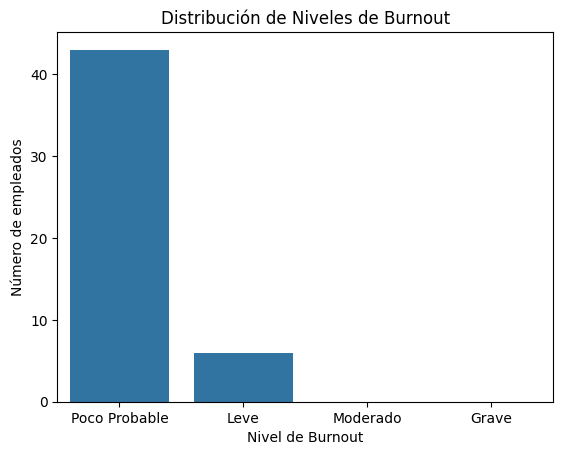

In [64]:
sns.countplot(x='prioridad', data=burnout_formulario_matrix_df, order=['Poco Probable', 'Leve', 'Moderado', 'Grave'])
plt.title('Distribución de Niveles de Burnout')
plt.xlabel('Nivel de Burnout')
plt.ylabel('Número de empleados')
plt.show()

In [65]:
fig = px.scatter(
    burnout_formulario_matrix_df,
    x='ID',
    y='ValorTotalEstres',
    color='prioridad',
    color_discrete_map={
        'Grave': 'red',
        'Moderado': 'orange',
        'Leve': 'yellow',
        'Poco Probable': 'green'
    },
    hover_data=['ID']
)

fig.update_layout(
    title='Niveles de Burnout por ID',
    xaxis_title='ID',
    yaxis_title='ValorTotalEstres',
    legend_title='Nivel de Burnout'
)

plot(fig, filename='/Users/juanreyesgarcia/Dev/Python/Django/reto/DreamedJobAI/html/burnout.html')

'/Users/juanreyesgarcia/Dev/Python/Django/reto/DreamedJobAI/html/burnout.html'

# Cleaning, Standardizing & Plotting -> UWES

In [66]:
uwes_formulario_df = uwes_df.copy()
uwes_formulario_df

,ID,En mi trabajo me siento lleno de energía.,Soy fuerte y energético en mi trabajo.,Estoy entusiasmado con mi trabajo.,Mi trabajo me inspira.,Cuando me levanto por las mañanas tengo ganas de ir a trabajar.,Soy feliz cuando estoy absorto en mi trabajo.,Estoy orgulloso del trabajo que hago.,Estoy inmerso en mi trabajo.,"Me ""dejo llevar"" por mi trabajo."
0,1001,,,,,...,,,,
1,1002,,,,,...,,,,
2,1003,Algunas veces,Algunas veces,Algunas veces,Algunas veces,Algunas veces ...,Algunas veces,Algunas veces,Algunas veces,Casi nunca
3,1004,Regularmente,Regularmente,Algunas veces,Algunas veces,Algunas veces ...,Casi nunca,Casi nunca,Algunas veces,Algunas veces
4,1005,Casi siempre,Casi siempre,Casi siempre,Casi siempre,Casi siempre ...,Casi siempre,Siempre,Casi siempre,Bastantes veces
5,1006,Algunas veces,Algunas veces,Algunas veces,Casi nunca,Casi nunca ...,Casi nunca,Regularmente,Casi nunca,Algunas veces
6,1007,,,,,...,,,,
7,1008,,,,,...,,,,
8,1009,Regularmente,Regularmente,Regularmente,Bastantes veces,Regularmente ...,Bastantes veces,Bastantes veces,Regularmente,Regularmente
9,1010,Regularmente,Algunas veces,Regularmente,Regularmente,Regularmente ...,Algunas veces,Bastantes veces,Algunas veces,Casi nunca


In [67]:
uwes_formulario_mapping = {
    "Siempre": 6,
    "Casi siempre": 5,
    "Bastantes veces": 4,
    "Regularmente": 3,
    "Algunas veces": 2,
    "Casi nunca": 1,
    "Nunca": 0
}

In [68]:
# Limpiando
pattern_to_replace = r"\s*\.{3,}\s*"

for column in uwes_formulario_df.select_dtypes(include='object').columns:
    uwes_formulario_df.loc[:, column] = (
        uwes_formulario_df.loc[:, column]
        .str.replace(pattern_to_replace, "", regex=True)
        .str.strip()
    )

uwes_formulario_df.head()

,ID,En mi trabajo me siento lleno de energía.,Soy fuerte y energético en mi trabajo.,Estoy entusiasmado con mi trabajo.,Mi trabajo me inspira.,Cuando me levanto por las mañanas tengo ganas de ir a trabajar.,Soy feliz cuando estoy absorto en mi trabajo.,Estoy orgulloso del trabajo que hago.,Estoy inmerso en mi trabajo.,"Me ""dejo llevar"" por mi trabajo."
0,1001,,,,,,,,,
1,1002,,,,,,,,,
2,1003,Algunas veces,Algunas veces,Algunas veces,Algunas veces,Algunas veces,Algunas veces,Algunas veces,Algunas veces,Casi nunca
3,1004,Regularmente,Regularmente,Algunas veces,Algunas veces,Algunas veces,Casi nunca,Casi nunca,Algunas veces,Algunas veces
4,1005,Casi siempre,Casi siempre,Casi siempre,Casi siempre,Casi siempre,Casi siempre,Siempre,Casi siempre,Bastantes veces


In [69]:
uwes_formulario_df.replace(r'^\s*$', np.nan, regex=True, inplace=True)
uwes_formulario_df = uwes_formulario_df.fillna(0)
uwes_formulario_df.head()

,ID,En mi trabajo me siento lleno de energía.,Soy fuerte y energético en mi trabajo.,Estoy entusiasmado con mi trabajo.,Mi trabajo me inspira.,Cuando me levanto por las mañanas tengo ganas de ir a trabajar.,Soy feliz cuando estoy absorto en mi trabajo.,Estoy orgulloso del trabajo que hago.,Estoy inmerso en mi trabajo.,"Me ""dejo llevar"" por mi trabajo."
0,1001,0,0,0,0,0,0,0,0,0
1,1002,0,0,0,0,0,0,0,0,0
2,1003,Algunas veces,Algunas veces,Algunas veces,Algunas veces,Algunas veces,Algunas veces,Algunas veces,Algunas veces,Casi nunca
3,1004,Regularmente,Regularmente,Algunas veces,Algunas veces,Algunas veces,Casi nunca,Casi nunca,Algunas veces,Algunas veces
4,1005,Casi siempre,Casi siempre,Casi siempre,Casi siempre,Casi siempre,Casi siempre,Siempre,Casi siempre,Bastantes veces


In [70]:
textual_to_numerical(uwes_formulario_df, uwes_formulario_mapping)
uwes_formulario_df.head()

,ID,En mi trabajo me siento lleno de energía.,Soy fuerte y energético en mi trabajo.,Estoy entusiasmado con mi trabajo.,Mi trabajo me inspira.,Cuando me levanto por las mañanas tengo ganas de ir a trabajar.,Soy feliz cuando estoy absorto en mi trabajo.,Estoy orgulloso del trabajo que hago.,Estoy inmerso en mi trabajo.,"Me ""dejo llevar"" por mi trabajo."
0,1001,0,0,0,0,0,0,0,0,0
1,1002,0,0,0,0,0,0,0,0,0
2,1003,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0
3,1004,3.0,3.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0
4,1005,5.0,5.0,5.0,5.0,5.0,5.0,6.0,5.0,4.0


In [71]:
#Calcula el total
for col in uwes_formulario_df.columns[1:]: 
    uwes_formulario_df[col] = pd.to_numeric(uwes_formulario_df[col], errors='coerce')

uwes_formulario_df['ValorTotalBienestarLaboral'] = uwes_formulario_df.iloc[:, 1:].sum(axis=1)

uwes_formulario_df['ValorTotalBienestarLaboral'] = uwes_formulario_df['ValorTotalBienestarLaboral'].astype('Int64')

uwes_formulario_df.head()


,ID,En mi trabajo me siento lleno de energía.,Soy fuerte y energético en mi trabajo.,Estoy entusiasmado con mi trabajo.,Mi trabajo me inspira.,Cuando me levanto por las mañanas tengo ganas de ir a trabajar.,Soy feliz cuando estoy absorto en mi trabajo.,Estoy orgulloso del trabajo que hago.,Estoy inmerso en mi trabajo.,"Me ""dejo llevar"" por mi trabajo.",ValorTotalBienestarLaboral
0,1001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,1002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,1003,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,17
3,1004,3.0,3.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,18
4,1005,5.0,5.0,5.0,5.0,5.0,5.0,6.0,5.0,4.0,45


In [72]:
uwes_formulario_matrix_columns = [0, -1]

uwes_formulario_matrix_df = uwes_formulario_df.iloc[:, uwes_formulario_matrix_columns].copy()

uwes_formulario_matrix_df.head()

,ID,ValorTotalBienestarLaboral
0,1001,0
1,1002,0
2,1003,17
3,1004,18
4,1005,45


In [73]:
def categorize_uwes(value):
    if value <= 17:
        return 'Bajo'
    elif 18 <= value <= 35:
        return 'Moderado'
    else:
        return 'Alto'

uwes_formulario_matrix_df['prioridad'] = uwes_formulario_matrix_df['ValorTotalBienestarLaboral'].apply(categorize_uwes)
uwes_formulario_matrix_df.head()

,ID,ValorTotalBienestarLaboral,prioridad
0,1001,0,Bajo
1,1002,0,Bajo
2,1003,17,Bajo
3,1004,18,Moderado
4,1005,45,Alto


### GRÁFICA UWES

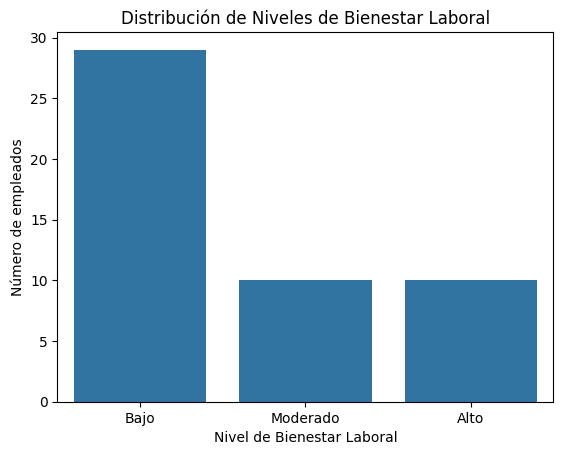

In [74]:
sns.countplot(x='prioridad', data=uwes_formulario_matrix_df, order=['Bajo', 'Moderado', 'Alto'])
plt.title('Distribución de Niveles de Bienestar Laboral')
plt.xlabel('Nivel de Bienestar Laboral')
plt.ylabel('Número de empleados')
plt.show()

In [75]:
uwes_formulario_matrix_df.columns = uwes_formulario_matrix_df.columns.str.strip()

In [76]:
fig = px.scatter(
    uwes_formulario_matrix_df,
    x='ID',
    y='ValorTotalBienestarLaboral',
    color='prioridad',
    color_discrete_map={
        'Alto': 'green',
        'Moderado': 'yellow',
        'Bajo': 'red'
    },
    hover_data=['ID']
)

fig.update_layout(
    title='Niveles de Bienestar Laboral por ID',
    xaxis_title='ID',
    yaxis_title='ValorTotalBienestarLaboral',
    legend_title='Nivel de Bienestar Laboral'
)

plot(fig, filename='/Users/juanreyesgarcia/Dev/Python/Django/reto/DreamedJobAI/html/uwes.html')

'/Users/juanreyesgarcia/Dev/Python/Django/reto/DreamedJobAI/html/uwes.html'